# 选择最优模型
假设模型效果不好，应该如何改善？
- 用更复杂/更灵活的模型
- 用更简单/更确定的模型
- 采集更多的训练样本
- 为每个样本采集更多的特征

“最优模型”的问题，基本上可以看成是找到偏差与方差平衡点的问题。
- 欠拟合，高偏差，数据本质上比直线要复杂，直线永远不可能很好地描述这份数据，也就是，模型没有足够的灵活性来适应数据的所有特征
- 过拟合，高方差，模型过于灵活，在适应数据所有特征的同时，也适应了随机误差

# 验证曲线
具有以下特征：
- 训练得分肯定高于验证得分。一般情况下，模型拟合自己接触过的数据，比拟合没接触过的数据效果要好
- 使用复杂度较低的模型（高偏差）时，训练数据往往欠拟合，说明模型对`训练数据和新数据`都缺乏预测能力
- 而使用复杂度较高的模型（高方差）时，训练数据往往过拟合，说明模型对`训练数据`预测能力很强，但对`新数据`预测能力很差
- 当使用复杂度适中的模型时，验证曲线得分最高。说明在该模型复杂度条件下，偏差与方差达到均衡状态

> 模型的复杂度要适度，太简单或太复杂都不行

# 学习曲线
影响模型复杂度的另一个重要因素是，最优模型往往受到训练数据量的影响。

反映`训练集数据规模的训练得分`/`验证得分曲线`称为学习曲线（learning curve）。

> 验证曲线，体现的是，模型复杂度与模型得分的曲线
>
> 学习曲线，体现的是，训练集大小的得分与验证曲线的关系

学习曲线的特征：
- 特定复杂度的模型对较小的数据集容易过拟合：此时训练得分较高，验证得分较低
- 特定复杂度的模型对较大的数据集容易欠拟合：随着数据量的增大，训练得分会不断降低，而验证得分会不断升高
- 模型的验证集得分永远不会高于训练集得分：两条曲线一直在靠近，但永远不会交叉

随着训练样本数据量的增加，分数会收敛到定值。因此，一旦你的数据多到使模型得分已经收敛，那么增加更多的训练样本也无济于事。改善模型性能的唯一方法就是换模型。

# 网格搜索

实际中，模型通常会有多个得分转折点，因此验证曲线和学习曲线的图形会从二维曲线变成多维曲面。

In [43]:
%matplotlib inline
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [44]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

X, y = make_data(40)

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);

In [45]:
model = grid.best_estimator_
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

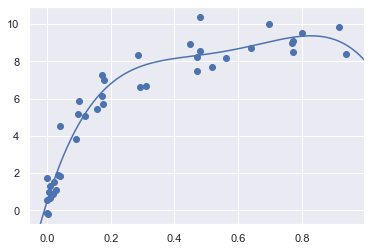

In [46]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);